### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

**Independent Variable:** Variables that are changed during the experiment. In this scenario Congruent or Incongruent are the Independant variables

**Dependent Variable:** Is the variable that is being measured/ predicted. In this scenario the Time to complete the test is the dependent variable 

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

**Null Hypothesis (H0):** If the name of a color is printed in a color which is not denoted by the name, this has NO effect when naming the color of the word. In summary **There is no change in time between Congruent and Incogruent tasks**

                                H0 =  μincongruent ≤ μcongruent

**Alternative Hypothesis (H1):** If the name of a color is printed in a color which is not denoted by the name, naming the color of the word TAKES LONGER. In summary **Incongruent times take longer than congruent tasks**

                                 H1 =  μincongruent > μcongruent


(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
#Importing Libraries and loading dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

df = pd.read_csv('stroopdata.csv')

In [2]:
#exploring dataset
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [3]:
#Reporting Descriptive Statistics
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


The Mean for **Congruent** tasks is **14.05**
The Mean for **Incongruent** tasks is **22.016**

The Standard Deviation for **Congruent** tasks is **3.56**
The Standard Deviation for **Incongruent** tasks is **4.79**

We can already see that statistics for Incongruent tasks are higher than Congruent tasks.

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

Text(0,0.5,'Frequency')

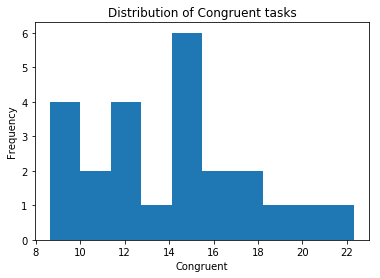

In [4]:
# Distribution of Congruent tasks
plt.hist(df['Congruent']);
plt.title('Distribution of Congruent tasks')
plt.xlabel('Congruent')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

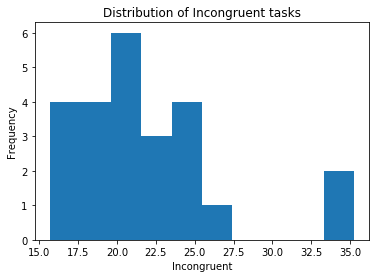

In [5]:
# Distribution of Incongruent tasks
plt.hist(df['Incongruent']);
plt.title('Distribution of Incongruent tasks')
plt.xlabel('Incongruent')
plt.ylabel('Frequency')

Text(0.5,1,'Congruent VS. Incongruent tasks Response time')

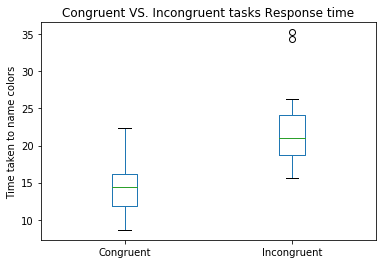

In [13]:
df[['Congruent', 'Incongruent']].plot(kind='box');
plt.ylabel("Time taken to name colors");
plt.title('Congruent VS. Incongruent tasks Response time')

Both Distribution graphs for Congruent and Incongruent Tasks show they are slightly positively Skewed, however they both show a noticieable peak which align to the mean results for each distribution.

The Box Plot continues to reveal that the reponse time for Incongruent tasks is higher than for congrent tasks.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

For this experiment the best statistic test to perform is **Dependent t - test (Two tailed)**, because:

- We are comparing two dependent samples of data.
- We want to compare the means for both Congruent and Incongruent tasks, to determine if there is statistically significant difference between both means.
- Sample Sizes are small (Less than 30).
- We are going to use a 5% Significance Level (0.05), which means the two-tailed test allocates 0.025 in both left and right tails (2.5%).


In [19]:
#Checking Sample Sizes
df['Congruent'].size, df['Incongruent'].size

(24, 24)

In [20]:
# Perform the statistical test here
#Set Columns to lists to use in t-test function

congru = df['Congruent'].values.tolist()
incongru = df['Incongruent'].values.tolist()

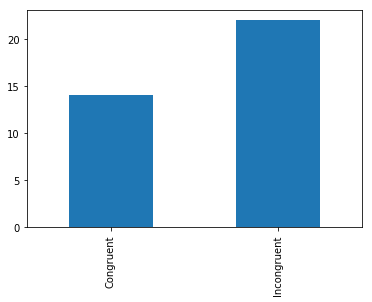

In [21]:
#plot the means
df.mean().plot('bar')

In [32]:
#Get t-critical values for a 95% confidence level and 23 degress of Freedom
from scipy.stats import t
t.ppf(.95, 23)

1.7138715277470473

In [26]:
#Perform T-Test
stats.ttest_rel(congru,incongru)

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)

The t-statistic that results from a dependent two-tailed t- test of the average time it takes to complete Congruent tasks vs. Incongruent tasks is 8.0207

The p-value that results from of a dependant two-tailed t-test of the average time it takes to complete Congruent tasks vs. Incongruent tasks is 4.5949489622951854e-08

Using a 5% level for statistical significance, we can **reject the Null Hypothesis** since:

-We obtained a P-Value lower than our significance level of (0.05) which suggests that Incongruent tasks take longer than Congruent Tasks
-The t-statistic of 8.0207 is greater than critical value of 1.7139.

